In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')

In [53]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [55]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'RemoteWork', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis=1)

In [56]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,RemoteWork,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",Fully remote,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time","Hybrid (some remote, some in-person)",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",Fully remote,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time","Hybrid (some remote, some in-person)",NaN


In [57]:
df = df[df['Salary'].notnull()]

In [58]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,RemoteWork,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time","Hybrid (some remote, some in-person)",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",Fully remote,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time","Hybrid (some remote, some in-person)",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time","Hybrid (some remote, some in-person)",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",Fully remote,194400.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   RemoteWork    38015 non-null  object 
 5   Salary        38071 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


In [60]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
RemoteWork      0
Salary          0
dtype: int64

In [61]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31379 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31379 non-null  object 
 1   EdLevel       31379 non-null  object 
 2   YearsCodePro  31379 non-null  object 
 3   RemoteWork    31379 non-null  object 
 4   Salary        31379 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [63]:
df['Country'].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [64]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
            
    return categorical_map

In [65]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   8641
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              415
Name: Country, dtype: in

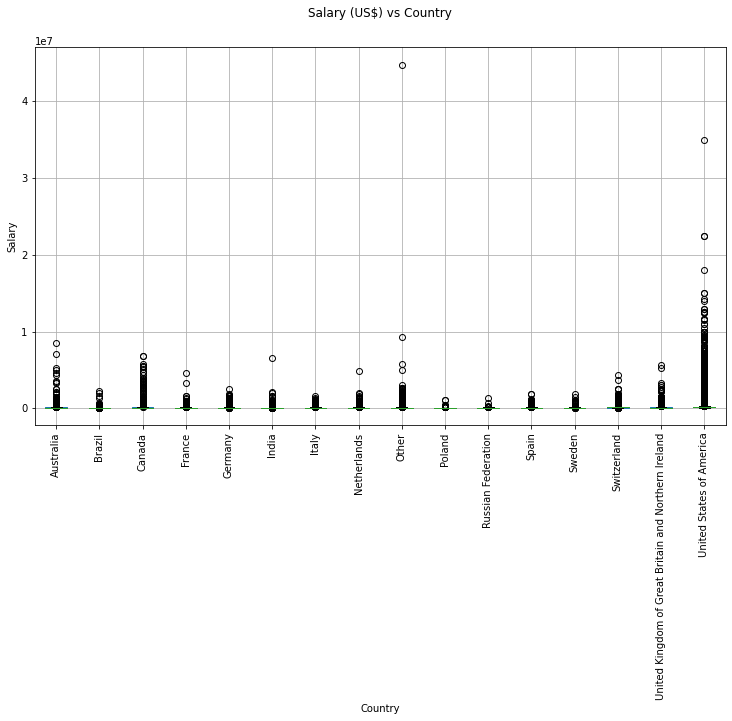

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [67]:
df = df[df['Salary'] <= 300000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

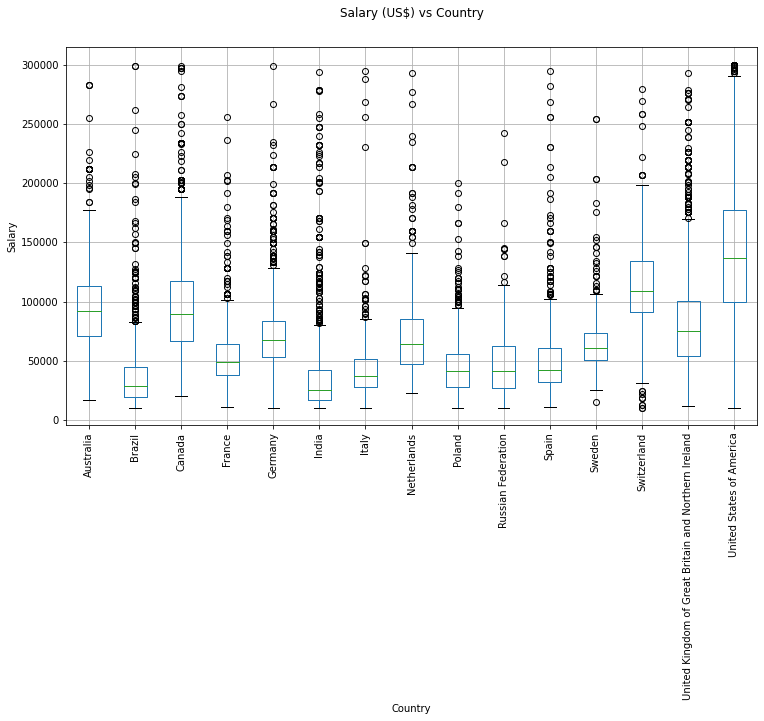

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [69]:
df['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [70]:
def cleanExp(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 50
    return float(x)

In [71]:
df['YearsCodePro'] = df['YearsCodePro'].apply(cleanExp)

In [72]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [73]:
def cleanEd(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    if "Master" in x:
        return "Master's degree"
    if "Professional" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelor's"

In [74]:
df['EdLevel'] = df['EdLevel'].apply(cleanEd)

In [75]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", "Less than a Bachelor's",
       'Post grad'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder

le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])

In [77]:
df['EdLevel'].unique()

array([2, 0, 1, 3])

In [78]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [79]:
df['Country'].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [80]:
df['RemoteWork'].unique()

array(['Hybrid (some remote, some in-person)', 'Fully remote',
       'Full in-person'], dtype=object)

In [81]:
le_mode = LabelEncoder()
df['RemoteWork'] = le_mode.fit_transform(df['RemoteWork'])

In [82]:
df['RemoteWork'].unique()

array([2, 1, 0])

In [83]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [84]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [85]:
y_pred = linear_reg.predict(X)

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

error = np.sqrt(mean_squared_error(y, y_pred))

In [87]:
print("${:,.2f}".format(error))

$49,366.89


In [88]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor()

In [89]:
y_pred = dec_tree_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))

In [90]:
print("${:,.2f}".format(error))

$36,331.69


In [91]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg = RandomForestRegressor(random_state=0)
rand_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [92]:
y_pred = rand_forest_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))

In [93]:
print("${:,.2f}".format(error))

$36,554.83


In [94]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12, 13, 14]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X, y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 13, 14]},
             scoring='neg_mean_squared_error')

In [95]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)

RandomForestRegressor(max_depth=8, random_state=0)

In [96]:
y_pred = regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))

In [97]:
print("${:,.2f}".format(error))

$38,906.11


In [98]:
X

,Country,EdLevel,YearsCodePro,RemoteWork
2,13,2,5.0,2
8,7,2,6.0,2
10,13,0,2.0,2
12,14,0,5.0,2
21,6,2,4.0,2
...,...,...,...,...
73113,14,2,5.0,1
73116,14,0,16.0,2
73119,14,0,1.0,2
73120,10,0,2.0,1


In [99]:
import pickle

In [100]:
data ={"model": regressor, "le_country": le_country, "le_education": le_ed, "le_remote": le_mode}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [101]:
# with open('saved_steps.pkl', 'rb') as file:
#     pickle.load(file)
    
# regressor_loaded = data['model']
# le_country = data['le_country']
# le_education = data['le_education']
# le_remote = data['le_remote']

In [102]:
# y_pred = regressor_loaded.predict(X)

# y_pred